# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [1]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.3 huggingface_hub==0.30.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.2/481.2 kB 15.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.39.0 requires huggingface-hub<1.0,>=0.33.5, but you have huggingface-hub 0.30.1 which is incompatible.
transformers 4.54.1 requires huggingface-hub<1.0,>=0.34.0, but you have huggingface-hub 0.30.1 which is incompatible.


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import math

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading the dataset**

In [3]:
superkart = pd.read_csv('/content/drive/MyDrive/ml_course/Section 7 Model Deployment/Project/SuperKart.csv')

In [4]:
data = superkart.copy()

# **Data Overview**

In [ ]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [ ]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset")

There are 8763 rows and 12 columns in the dataset


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


* Product Id can be dropped as this is a unique value for each item.
* Store Establishment Year is an integer, but since there are only 4 stores there are only 4 years, so we will make this a category instead.

In [ ]:
data.isnull().sum()

,0
Product_Id,0
Product_Weight,0
Product_Sugar_Content,0
Product_Allocated_Area,0
Product_Type,0
Product_MRP,0
Store_Id,0
Store_Establishment_Year,0
Store_Size,0
Store_Location_City_Type,0


There are no null values in the dataset

In [ ]:
data.duplicated().sum()

np.int64(0)

There are no duplicates in the dataset

In [ ]:
for feature in data.columns:
    if data[feature].dtype == 'object':
        print(data[feature].value_counts())
        print("-" * 50)

Product_Sugar_Content
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: count, dtype: int64
--------------------------------------------------
Product_Type
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: count, dtype: int64
--------------------------------------------------
Store_Id
OUT004    4676
OUT001    1586
OUT003    1349
OUT002    1152
Name: count, dtype: int64
--------------------------------------------------
Store_Establishment_Year
2009    4676
1987    1586
1999    1349
1998    1152
Name: count, dtype: int64
----------

* The Product Sugar Content has 108 values labeled 'reg' which should be 'Regular' so we will convert these.
* The majority of Product Types is Fruits and Vegetables and Snack Foods.
* Store Id OUT004 has the most number of products.
* Medium sized stores in Tier 2 Locations have the most products.

In [5]:
data['Product_Sugar_Content'] = data['Product_Sugar_Content'].replace('reg', 'Regular')

In [ ]:
data['Product_Sugar_Content'].unique()

array(['Low Sugar', 'Regular', 'No Sugar'], dtype=object)

Here we have converted all 'reg' sugar labels to 'Regular'

In [6]:
data["Store_Establishment_Year"]=data["Store_Establishment_Year"].astype(object)

Here we have converted the store years to categories

In [7]:
data.drop('Product_Id',axis=1,inplace=True)

Here we have dropped Product Id

# **Exploratory Data Analysis (EDA)**

Let's analyze the Total Sales for each Product Type and Store Id.

In [ ]:
total_sales_product = data.groupby('Product_Type')['Product_Store_Sales_Total'].sum().reset_index().sort_values(by='Product_Store_Sales_Total', ascending=False)
total_sales_product

,Product_Type,Product_Store_Sales_Total
6,Fruits and Vegetables,4300833.27
13,Snack Foods,3988996.95
4,Dairy,2811918.04
5,Frozen Foods,2809980.83
9,Household,2564740.17
0,Baking Goods,2452986.00
3,Canned,2300082.71
8,Health and Hygiene,2163707.21
10,Meat,2129211.94
14,Soft Drinks,1797044.72


In [ ]:
total_sales_store = data.groupby('Store_Id')['Product_Store_Sales_Total'].sum().reset_index().sort_values(by='Product_Store_Sales_Total', ascending=False)
total_sales_store

,Store_Id,Product_Store_Sales_Total
3,OUT004,15427583.43
2,OUT003,6673457.57
0,OUT001,6223113.18
1,OUT002,2030909.72


* Fruits and Vegetables generate the most sales followed closely by Snack Foods.
* Seafood and Breakfast generate the least sales.
* Store Id 4 generates the mose sales and Store 2 generates the least.

In [ ]:
for store_id in data['Store_Id'].unique():
    print(f"Information for Store ID: {store_id}")
    display(data[data['Store_Id'] == store_id][['Store_Establishment_Year', 'Store_Size', 'Store_Location_City_Type', 'Store_Type']].head(1))
    print("-" * 50)

Information for Store ID: OUT004


,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type
0,2009,Medium,Tier 2,Supermarket Type2


--------------------------------------------------
Information for Store ID: OUT003


,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type
1,1999,Medium,Tier 1,Departmental Store


--------------------------------------------------
Information for Store ID: OUT001


,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type
2,1987,High,Tier 2,Supermarket Type1


--------------------------------------------------
Information for Store ID: OUT002


,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type
4,1998,Small,Tier 3,Food Mart


--------------------------------------------------


* It seems that the Store Establishment Year and Store Type are both unique features for Stores.
* Although we could drop these as they don't provide any additional value, we will keep them for now in case SuperKart adds any new stores.

In [ ]:
display(data[data['Store_Id'] == 'OUT002'][['Product_Type']].value_counts())

,count
Product_Type,
Fruits and Vegetables,168
Snack Foods,146
Dairy,104
Frozen Foods,101
Household,100
Baking Goods,96
Health and Hygiene,91
Canned,88
Meat,87


* These are the important attributes of Store Id "OUT002" that can be further analyzed to understand it's lower sales.

In [8]:
# Define the target variable
target = 'Product_Store_Sales_Total'

# List of numerical features in the dataset
numeric_features = [
    'Product_Weight',
    'Product_Allocated_Area',
    'Product_MRP',
    'Product_Store_Sales_Total',
]

# List of categorical features in the dataset
categorical_features = [
    'Product_Sugar_Content',
    'Product_Type',
    'Store_Id',
    'Store_Establishment_Year',
    'Store_Size',
    'Store_Location_City_Type',
    'Store_Type',
]

In [ ]:
data[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Weight,8763.0,12.653792,2.217320,4.000,11.150,12.660,14.180,22.000
Product_Allocated_Area,8763.0,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_MRP,8763.0,147.032539,30.694110,31.000,126.160,146.740,167.585,266.000
Product_Store_Sales_Total,8763.0,3464.003640,1065.630494,33.000,2761.715,3452.340,4145.165,8000.000


* Product Weight ranges from 4 to 22 with a mean of 12.65
* There is a wide range for Product Allocated Area of 0.004 to 0.298 but this is normal as products and stores will range is size.
* The mean Product MRP is 147.03.
* Product Sales Total range considerably from 33 to 8000 signifying some products hardly sell, such as Seafood and Breakfast.

In [ ]:
data[categorical_features].describe().T

,count,unique,top,freq
Product_Sugar_Content,8763,4,Low Sugar,4885
Product_Type,8763,16,Fruits and Vegetables,1249
Store_Id,8763,4,OUT004,4676
Store_Establishment_Year,8763,4,2009,4676
Store_Size,8763,3,Medium,6025
Store_Location_City_Type,8763,3,Tier 2,6262
Store_Type,8763,4,Supermarket Type2,4676


* Most Products are Low Sugar
* The most frequent Product Type is Fruits and Vegetables
* Store Id OUT004 has the most products

## Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

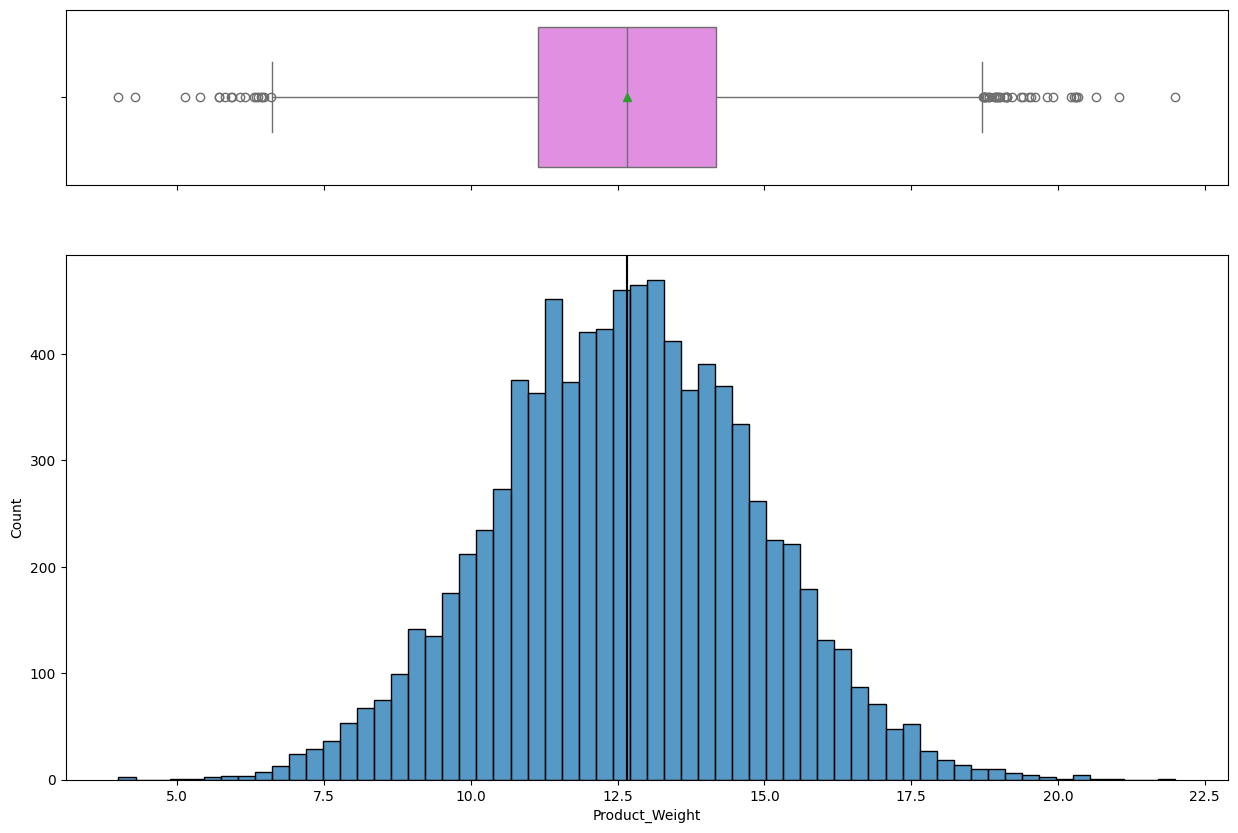

In [ ]:
histogram_boxplot(data, numeric_features[0])

* Product Weight has a balanced distribution.

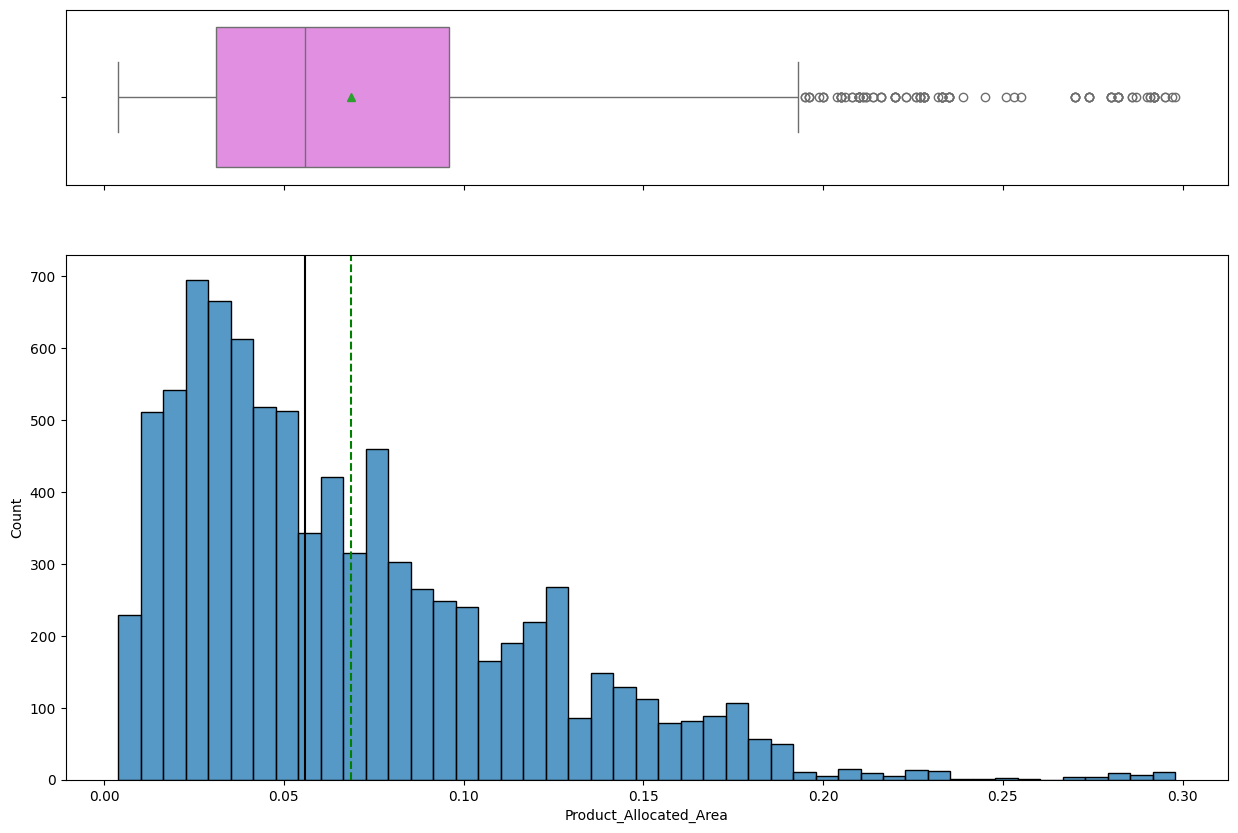

In [ ]:
histogram_boxplot(data, numeric_features[1])

* Product Allocated Area is skewed to the right, tending to occupy smaller areas.

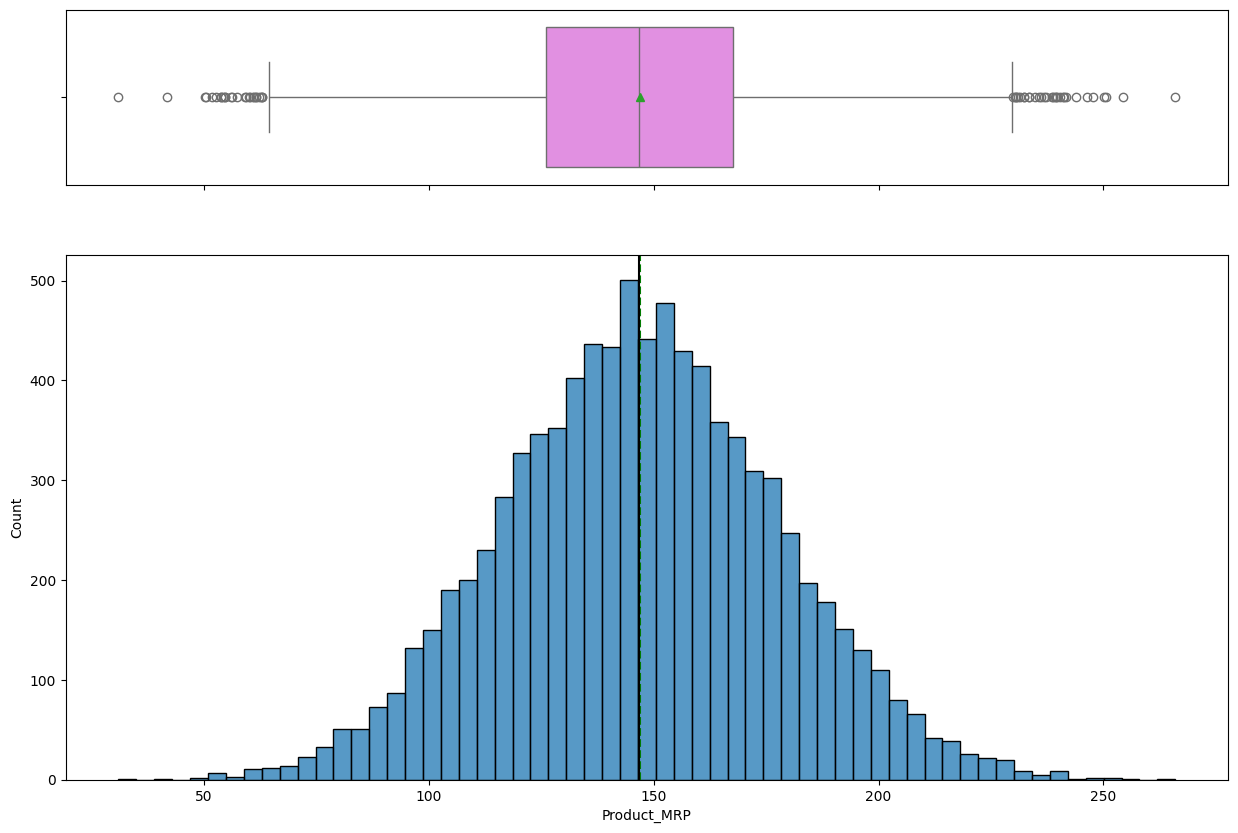

In [ ]:
histogram_boxplot(data, numeric_features[2])

* Product MRP is evenly distributed peaking at the median.

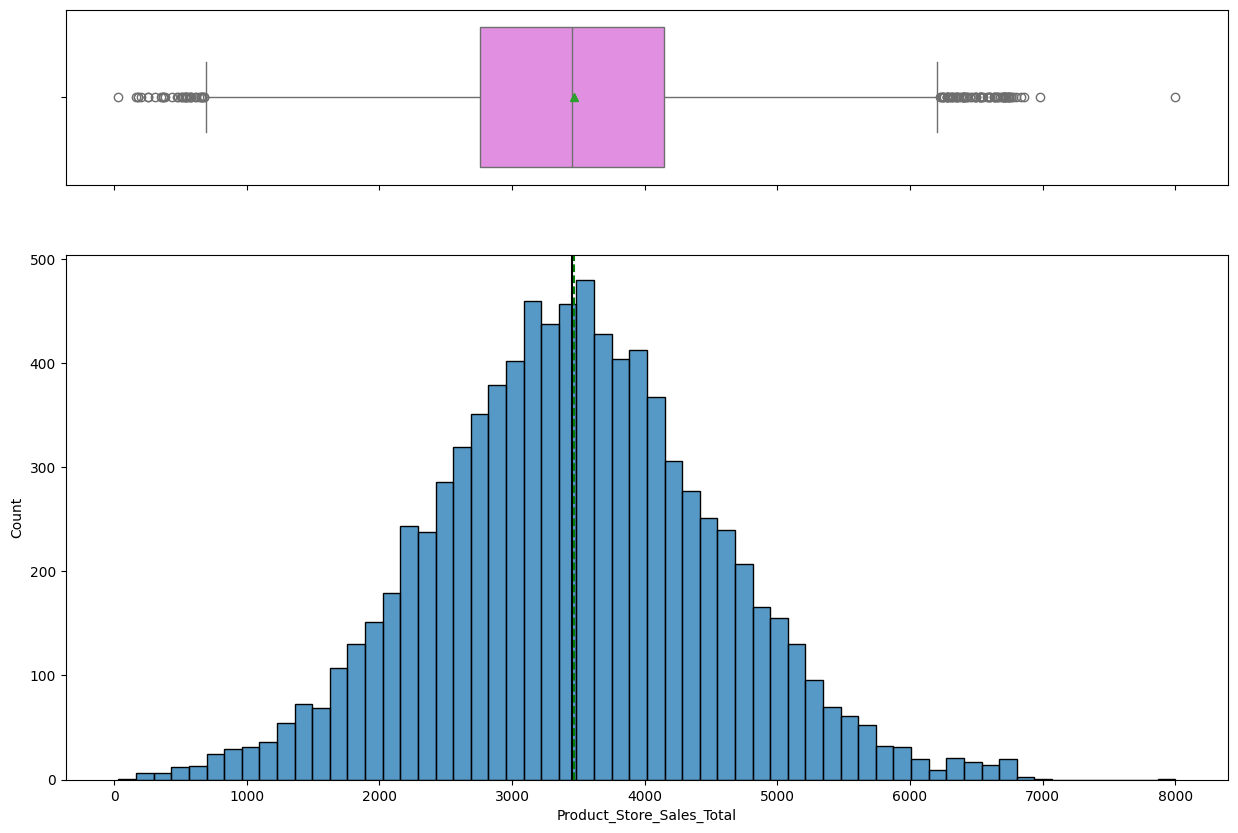

In [ ]:
histogram_boxplot(data, numeric_features[3])

* Product Store Sales Total is evenly distributed.

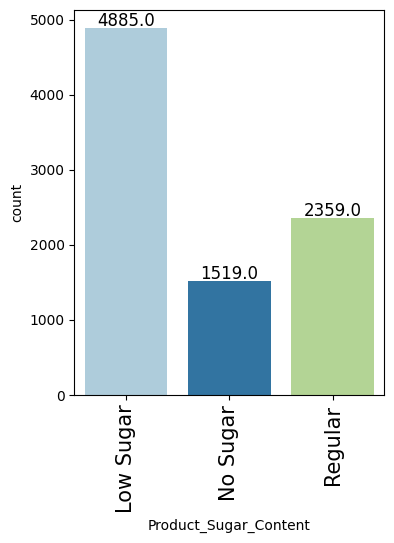

In [ ]:
labeled_barplot(data, categorical_features[0])

* More than 50% of products are Low Sugar

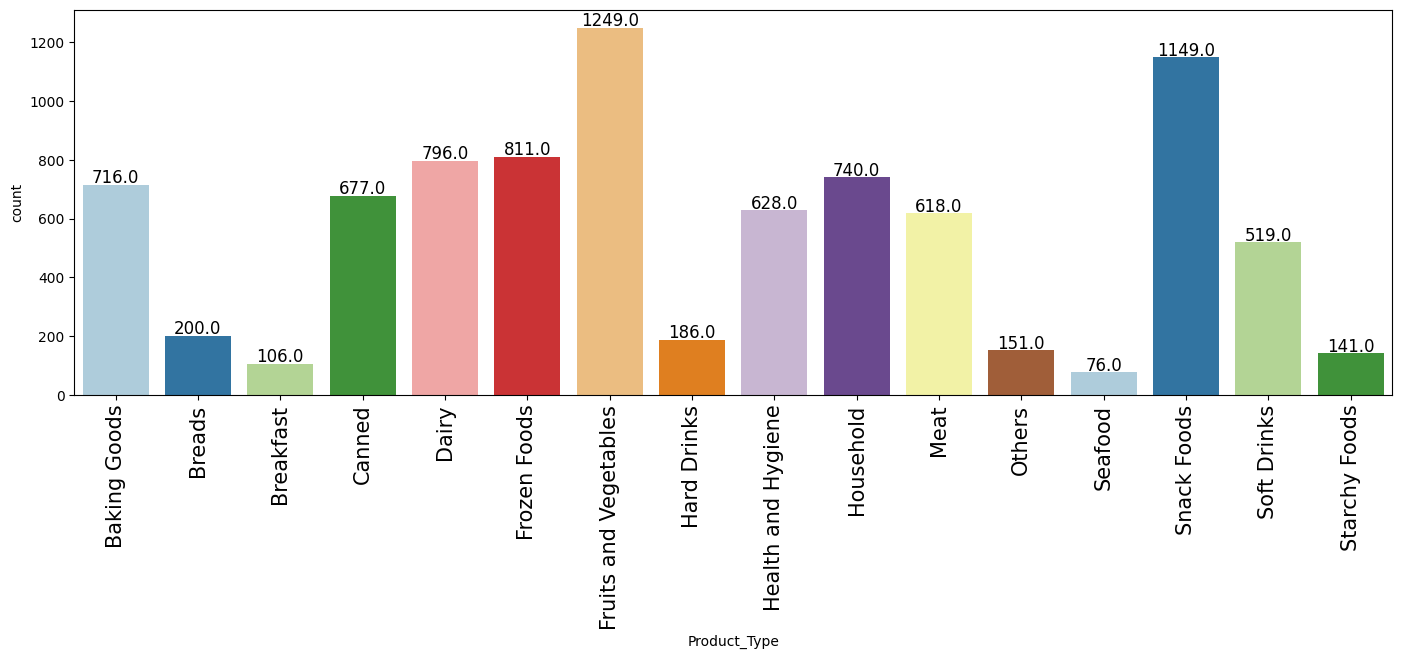

In [ ]:
labeled_barplot(data, categorical_features[1])

* Fruits and Vegetables and Snack Foods are the most carried Product Types
* Breads, Breakfast, Hard Drinks, Starchy Foods, Seafood, and Others are each under 500.

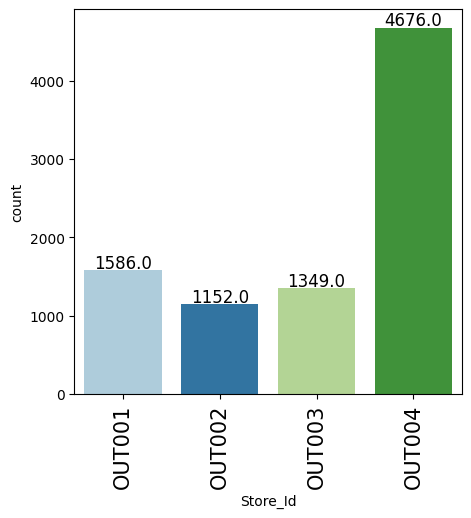

In [ ]:
labeled_barplot(data, categorical_features[2])

* Store Id OUT004 carries nearly 4x more product then every other store.

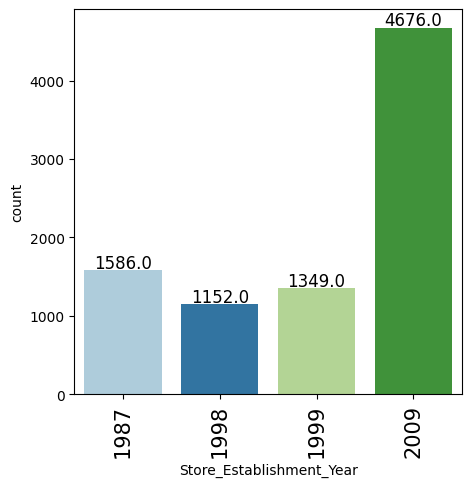

In [ ]:
labeled_barplot(data, categorical_features[3])

* Same observation as Store Id

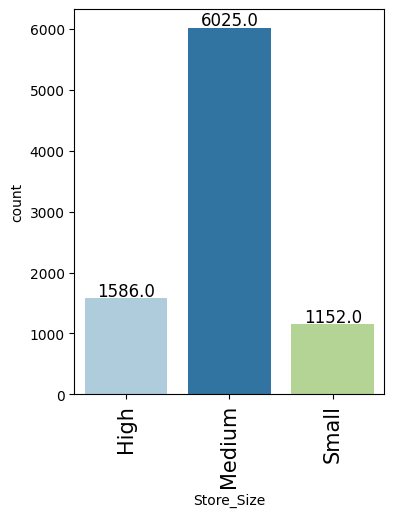

In [ ]:
labeled_barplot(data, categorical_features[4])

* Medium sized stores carry 68% of all productss

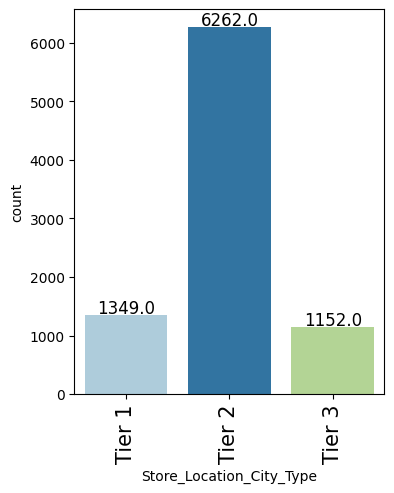

In [ ]:
labeled_barplot(data, categorical_features[5])

* Tier 2 contain nearly 70% of all products

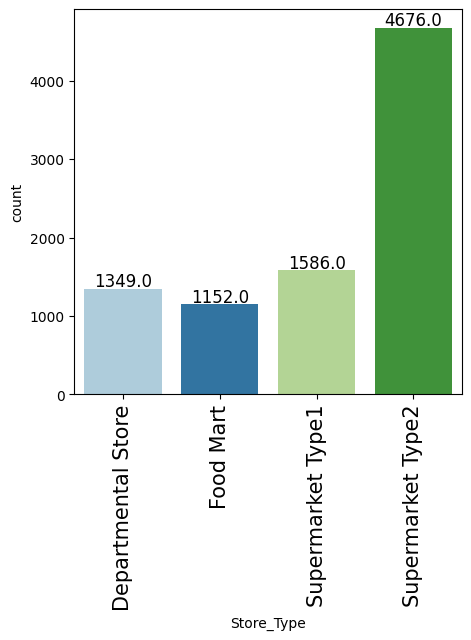

In [ ]:
labeled_barplot(data, categorical_features[6])

* Same observation as Store Id

## Bivariate Analysis

### Correlation Heatmap

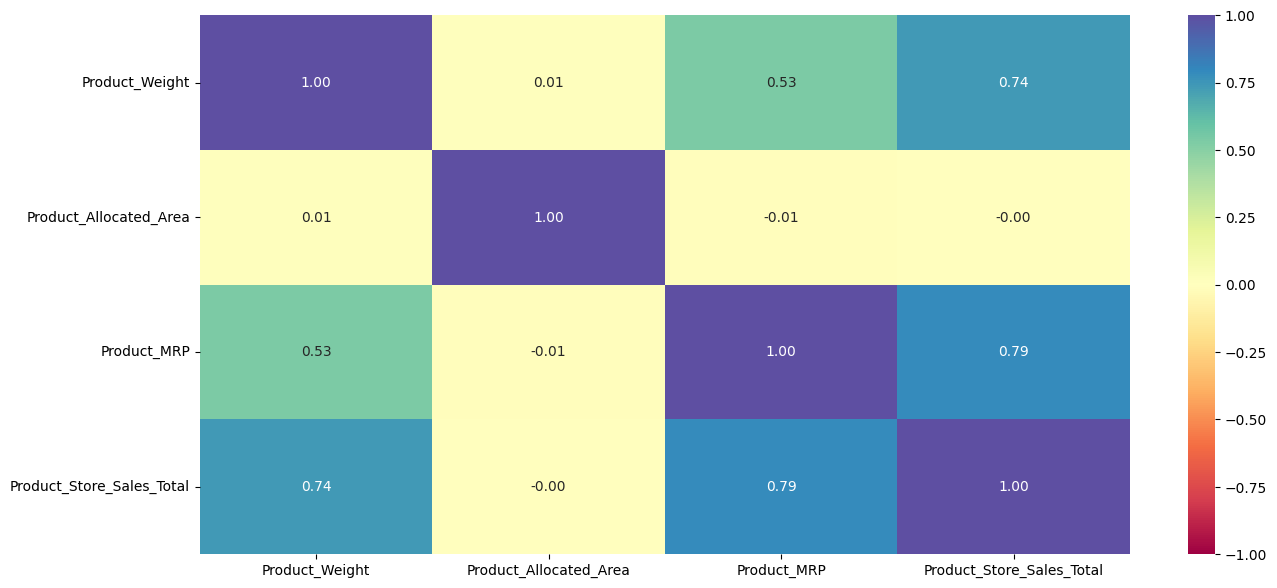

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[numeric_features].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Product Weight and MRP are highly correlated to Sales Total

### Product Sugar Content vs Product Store Sales Total

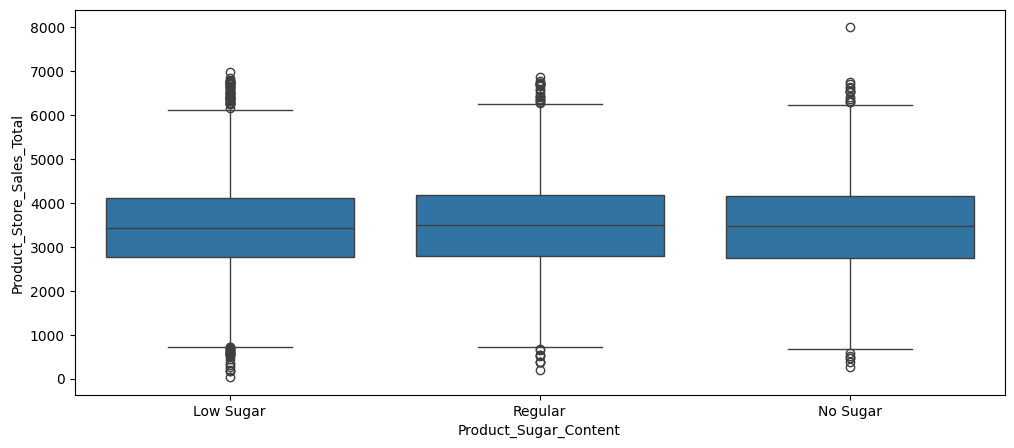

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=categorical_features[0], y=target, data=data)
plt.show()

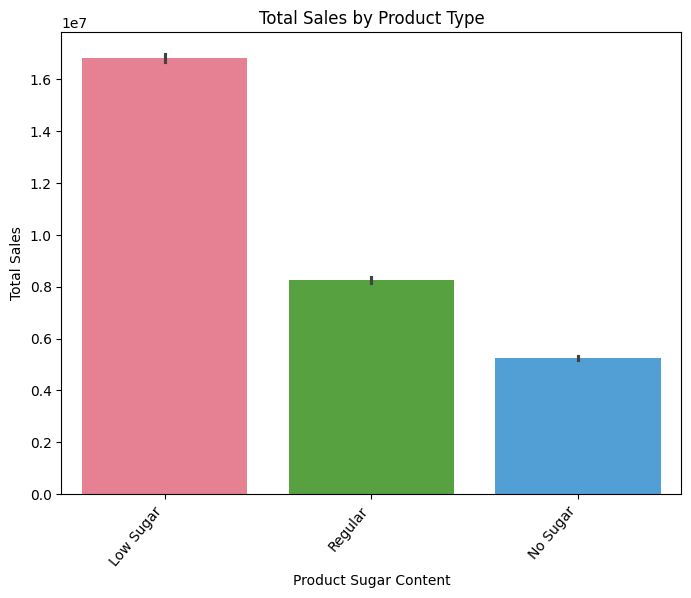

In [17]:
# Plot 'Product_Type' on the target feature. Define colors
colors= sns.color_palette('husl', data['Product_Sugar_Content'].nunique())

# Plot the data
plt.figure(figsize= (8,6))
sns.barplot(data=data, x= 'Product_Sugar_Content', y= 'Product_Store_Sales_Total', estimator= np.sum, palette= colors)
plt.xlabel('Product Sugar Content')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Type')
plt.xticks(rotation= 50, ha= 'right')
plt.show()

**Observations**
* All three sugar contents have nearly the same distribution for Product Sales Total, suggesting consistent sales.
* Low Sugar products generate the most sales indicating a preference towards healthier options

### Product Type vs Product Store Sales Total

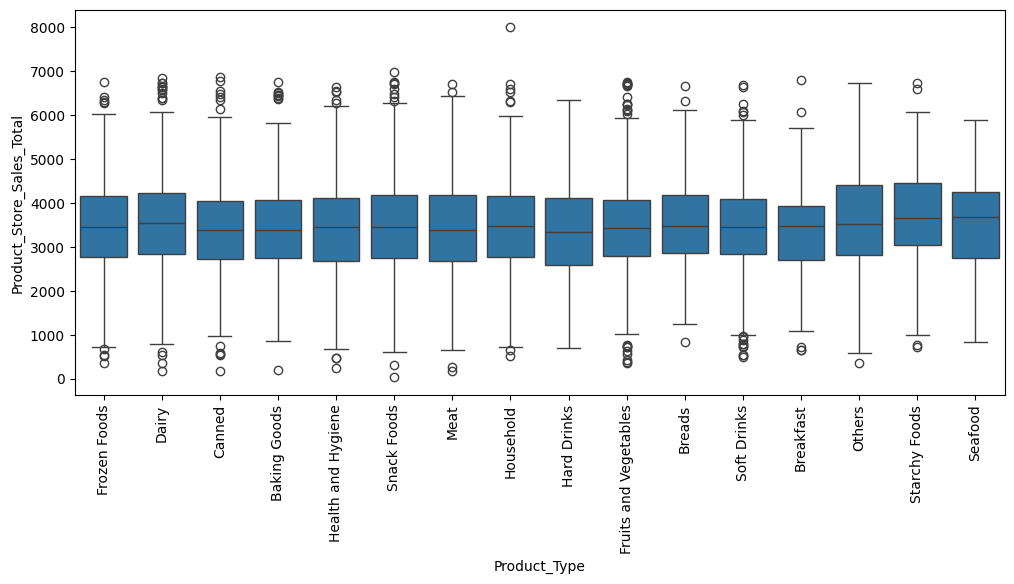

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=categorical_features[1], y=target, data=data)
plt.xticks(rotation=90)
plt.show()

* All Product Types have a similar sales distributions with a general median of around 3500.
* Seafood, Starchy Foods, Others have among the highest upper medians and wider spreads, suggesting potential for higher sales but also more inconsistency.
* Breakfast, Soft Drinks, Fruits and Vegetables show narrower interquartile ranges and more compact distributions, implying more consistent sales performance.
* Household, Snack Foods, Meat have several high-end outliers, indicating occasional very high sales spikes.
* Canned, Health and Hygiene have many low-end outliers, showing that some items in these categories sell poorly compared to others in the same category.


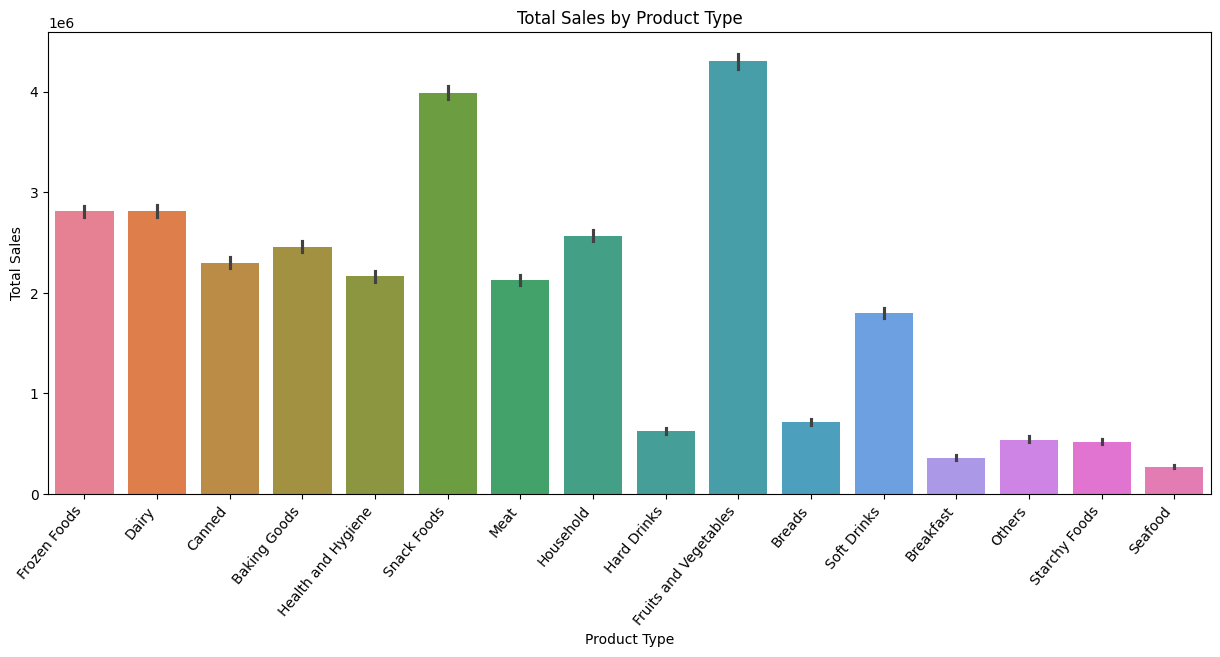

In [18]:
# Plot 'Product_Type' on the target feature. Define colors
colors= sns.color_palette('husl', data['Product_Type'].nunique())

# Plot the data
plt.figure(figsize= (15,6))
sns.barplot(data=data, x= 'Product_Type', y= 'Product_Store_Sales_Total', estimator= np.sum, palette= colors)
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Type')
plt.xticks(rotation= 50, ha= 'right')
plt.show()

### Store Id vs Product Store Sales Total

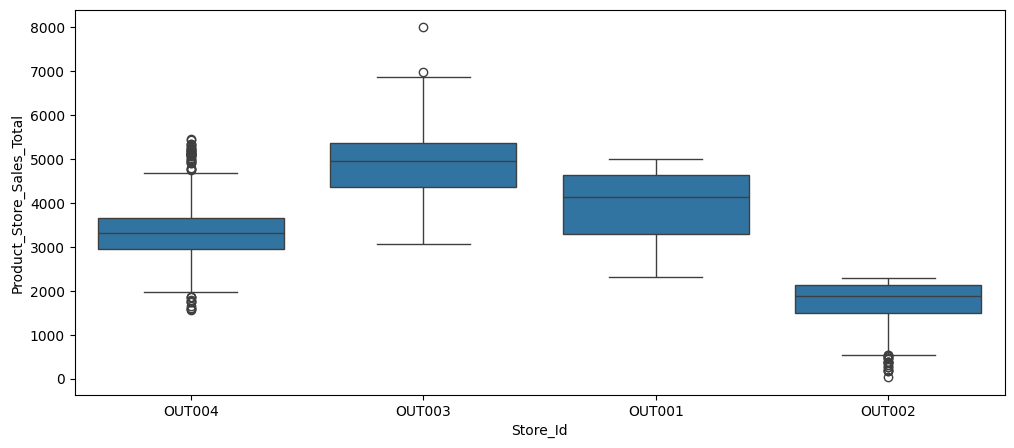

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=categorical_features[2], y=target, data=data)
plt.show()

* OUT003 shows the widest spread, indicating greater variability in sales.
* OUT003 is likely a high-performing store with both high median sales and high variability—possibly due to a wider product range or diverse customer base.
* OUT002 might be a lower-tier or smaller outlet, with consistently low sales.
* OUT001 and OUT004 are mid-range performers.

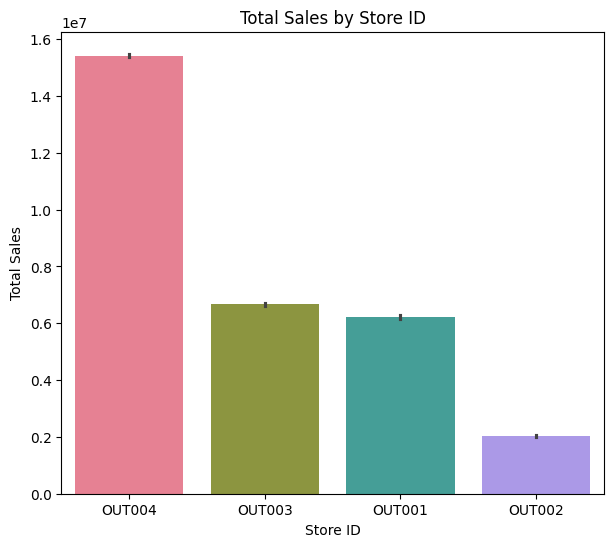

In [19]:
# Plot 'Store_Id' on the target feature. Define the colors
colors= sns.color_palette('husl', data['Store_Id'].nunique())

# Plot the data
plt.figure(figsize= (7,6))
sns.barplot(data= data, x= 'Store_Id', y= 'Product_Store_Sales_Total', estimator= np.sum, palette= colors)
plt.xlabel('Store ID')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store ID')
plt.show()

### Store Size vs Product Store Sales Total

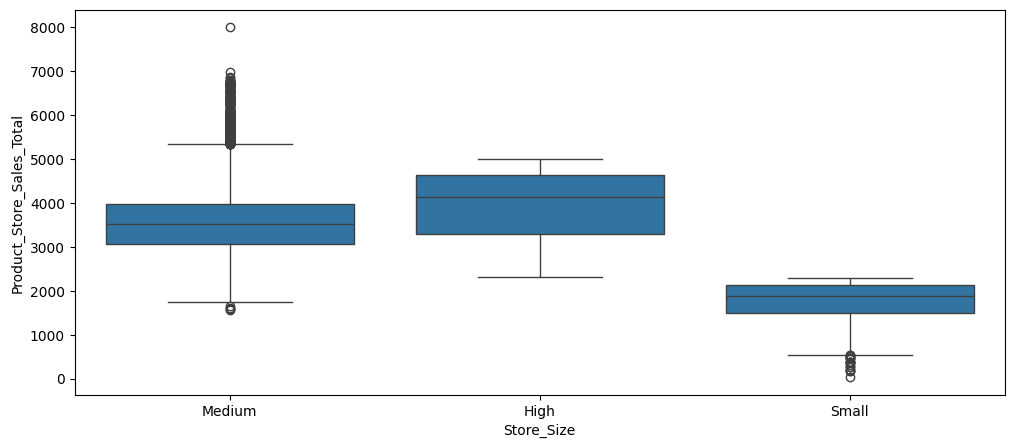

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=categorical_features[4], y=target, data=data)
plt.show()

* Medium sized stores have a narrow interquartile range and many high end outliers

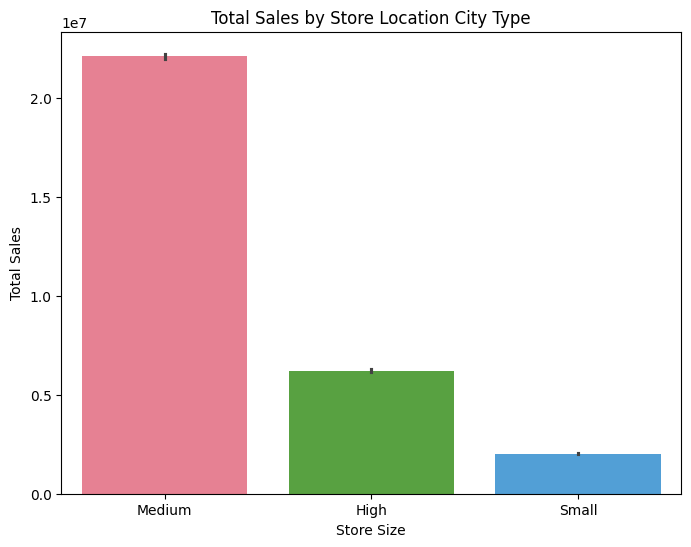

In [20]:
# Plot 'Store_Size' on the target feature. Define the colors
colors= sns.color_palette('husl', data['Store_Size'].nunique())

# Plot the data
plt.figure(figsize= (8,6))
sns.barplot(data= data, x= 'Store_Size', y= 'Product_Store_Sales_Total', estimator= np.sum, palette= colors)
plt.xlabel('Store Size')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store Location City Type')
plt.show()

### Store Location City Type vs Product Store Sales Total

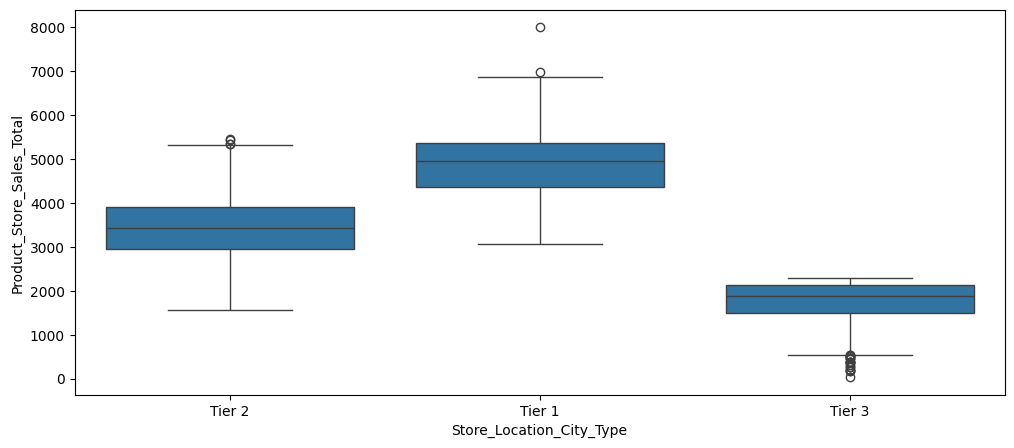

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=categorical_features[5], y=target, data=data)
plt.show()

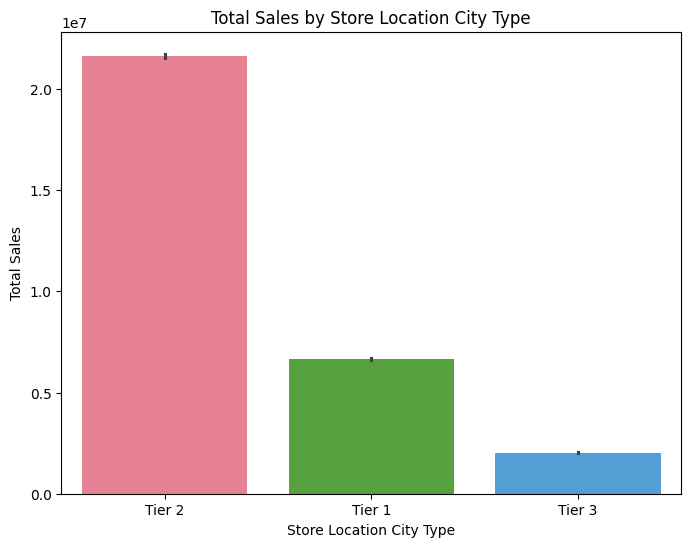

In [21]:
# Plot 'Store_Location_City_Type' on the target feature. Define the colors
colors= sns.color_palette('husl', data['Store_Location_City_Type'].nunique())

# Plot the data
plt.figure(figsize= (8,6))
sns.barplot(data= data, x= 'Store_Location_City_Type', y= 'Product_Store_Sales_Total', estimator= np.sum, palette= colors)
plt.xlabel('Store Location City Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store Location City Type')
plt.show()

### Heatmap of Store Id vs Sales

Text(0.5, 1.0, 'Store Product Sales Analysis')

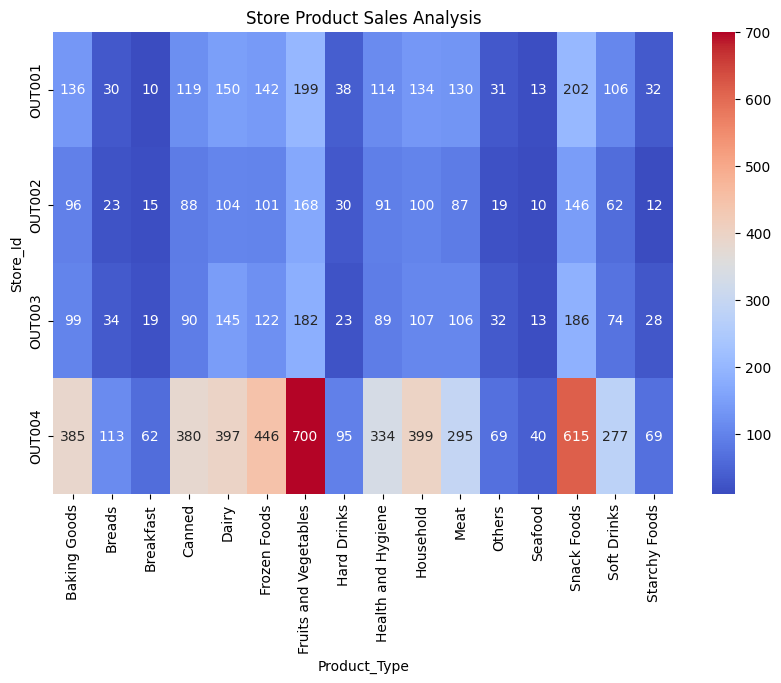

In [23]:
# Store product analysis
plt.figure(figsize= (10,6))
sns.heatmap(pd.crosstab(data['Store_Id'], data['Product_Type']), annot= True, cmap= 'coolwarm', fmt= 'g')
plt.title('Store Product Sales Analysis')

# **Data Preprocessing**

### Outlier Check

In [14]:
numeric_features = [
    'Product_Weight',
    'Product_Allocated_Area',
    'Product_MRP',
]

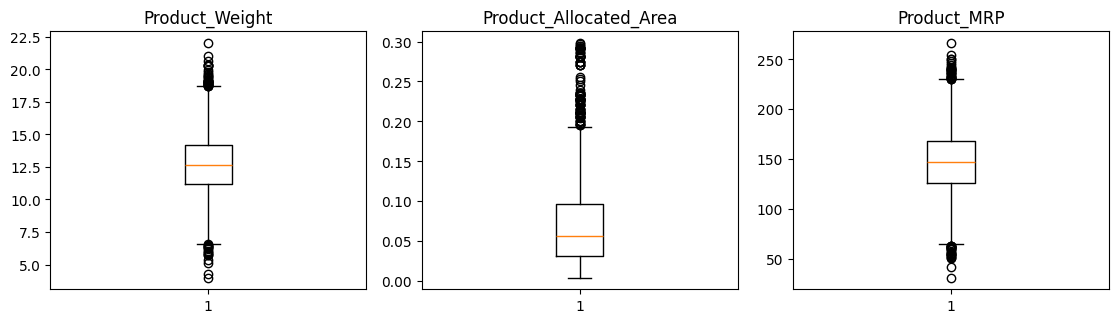

In [15]:
# outlier detection using boxplot
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_features):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are outliers present in each numeric column.
* Product Allocated Area is the heavily skewed however this seems normal since display areas for both products and stores vary greatly.
* Outliers in Product Weight are normal since certain products naturally weight more than others (e.g. a toothbrush vs a watermelon).
* The same can be said for Producct MRP, as certain products will cost more than others.
* We will therefore keep the outliers as they are normal data points.

In [ ]:
# Define predictor matrix (X) by dropping target
X = data.drop(target, axis=1)

# Define target variable
y = data[target]

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,              # Predictors (X) and target variable (y)
    test_size=0.2,     # 20% of the data is reserved for testing
    random_state=42    # Ensures reproducibility by setting a fixed random seed
)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7010, 10) (7010,)
(1753, 10) (1753,)


In [ ]:
# Create a preprocessing pipeline for numerical and categorical features

preprocessor = make_column_transformer(
    (Pipeline([('scaler', StandardScaler())]), numeric_features),
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
)

* We only need to perform a standard scaling to the numeric features and a one hot encoder for categorical.

# **Model Building**

## Define functions for Model Evaluation

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

The ML models to be built can be any two out of the following:
1. Decision Tree
2. Bagging
3. Random Forest
4. AdaBoost
5. Gradient Boosting
6. XGBoost

### Criteria

We will be primarily assessing our model on R-squared since we want to understand the variation in product prices based on the provided factors (type, size, store, etc.)

We will also be training two seperate models using Random Forest and XGB

### Model 1: Random Forest

In [ ]:
# Define base Random Forest model
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
# Create pipeline with preprocessing and Random Forest model
rf_pipeline = make_pipeline(preprocessor, rf_model)

#### Model Training

In [ ]:
# Train the model pipeline on the training data
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Establishment_Year',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

#### Model Performance

In [ ]:
rf_estimator_model_train_perf = model_performance_regression(rf_pipeline, X_train,y_train)
print("Training performance \n")
rf_estimator_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,106.919602,40.284897,0.989919,0.989905,0.015106


In [ ]:
rf_estimator_model_test_perf = model_performance_regression(rf_pipeline, X_test,y_test)
print("Testing performance \n")
rf_estimator_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,284.1663,109.421965,0.92923,0.928823,0.038876


* We can see that the Random Forest by itself scored quite high with a R-squared of 0.92923.
* The model did not overfit as it has a lower R-squared than the train set (0.989919)

### Model 2: XBGBoost

In [ ]:
# Define base XGBoost model
xgb_model = XGBRegressor(random_state=42)

In [ ]:
# Create pipeline with preprocessing and XGBoost model
xgb_pipeline = make_pipeline(preprocessor, xgb_model)

#### Model Training

In [ ]:
# Train the model pipeline on the training data
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Establishment_Year',
                                                   '...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
xgb_estimator_model_train_perf = model_performance_regression(xgb_pipeline, X_train, y_train)
print("Training performance \n")
xgb_estimator_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,132.873337,62.735069,0.984431,0.984409,0.022233


In [ ]:
xgb_estimator_model_test_perf = model_performance_regression(xgb_pipeline, X_test,y_test)
print("Testing performance \n")
xgb_estimator_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,310.10855,137.525173,0.915718,0.915234,0.050988


The XGBoost also scored quite high with 0.915718 however the Random Forest did slightly better.

# **Model Performance Improvement - Hyperparameter Tuning**

### Model 3: Random Forest Tuned

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestRegressor(random_state=42)

# Create pipeline with preprocessing and XGBoost model
rft_pipeline = make_pipeline(preprocessor, rf_tuned)

# Grid of parameters to choose from
param_grid = {
    'randomforestregressor__n_estimators': [100, 200, 300],
    'randomforestregressor__max_depth': [None, 10, 20, 30],
    'randomforestregressor__max_features': ['auto', 'sqrt'],
    'randomforestregressor__min_samples_split': [2, 5, 10],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

#### Model Training

In [ ]:
# Hyperparameter tuning with RandomizedSearchCV
grid_search = RandomizedSearchCV(rft_pipeline, param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Product_Weight',
                                                                                'Product_Allocated_Area',
                                                                                'Product_MRP']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Product_Sugar_Content',
                                                                                'Product_Type',
                                                                                'Stor...
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'randomforestregressor__max_depth': [None,
                                                                             10,
                                                                             20,
                                                                             30],
                                        'randomforestregressor__max_features': ['auto',
                                                                                'sqrt'],
                                        'randomforestregressor__min_samples_split': [2,
                                                                                     5,
                                                                                     10],
                                        'randomforestregressor__n_estimators': [100,
                                                                                200,
                                                                                300]},
                   scoring=make_scorer(r2_score, response_method='predict'))

In [ ]:
grid_search.best_params_

{'randomforestregressor__n_estimators': 200,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__max_features': 'sqrt',
 'randomforestregressor__max_depth': 30}

In [ ]:
rf_tuned = grid_search.best_estimator_
rf_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Establishment_Year',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=30, max_features='sqrt',
                                       n_estimators=200, random_state=42))])

#### Model Performance

In [ ]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
print("Training performance \n")
rf_tuned_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,119.311425,63.018489,0.987447,0.987429,0.024767


In [ ]:
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
print("Testing performance \n")
rf_tuned_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,316.487418,168.951381,0.912215,0.911711,0.063989


Surprisingly the Tuned Random Forest performed slightly worse than the untuned model, with a score of 0.912215

### Model 4: XGB Tuned

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBRegressor(random_state=42)

# Create pipeline with preprocessing and XGBoost model
xgb_pipeline = make_pipeline(preprocessor, xgb_tuned)

#Grid of parameters to choose from
param_grid = {
    'xgbregressor__n_estimators': [100, 150, 200],
    'xgbregressor__max_depth': [2, 3, 4],
    'xgbregressor__learning_rate': [0.01, 0.05, 0.1],
    'xgbregressor__subsample': [0.6, 0.8, 1.0],
    'xgbregressor__colsample_bytree': [0.5, 0.6, 0.8],
    'xgbregressor__gamma': [0, 1, 5],
    'xgbregressor__reg_alpha': [0, 0.5, 1.0],
    'xgbregressor__reg_lambda': [0.5, 1.0, 5.0]
}

scorer = metrics.make_scorer(metrics.r2_score)

In [ ]:
grid_search = RandomizedSearchCV(xgb_pipeline, param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Product_Weight',
                                                                                'Product_Allocated_Area',
                                                                                'Product_MRP']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Product_Sugar_Content',
                                                                                'Product_Type',
                                                                                'Stor...
                   param_distributions={'xgbregressor__colsample_bytree': [0.5,
                                                                           0.6,
                                                                           0.8],
                                        'xgbregressor__gamma': [0, 1, 5],
                                        'xgbregressor__learning_rate': [0.01,
                                                                        0.05,
                                                                        0.1],
                                        'xgbregressor__max_depth': [2, 3, 4],
                                        'xgbregressor__n_estimators': [100, 150,
                                                                       200],
                                        'xgbregressor__reg_alpha': [0, 0.5,
                                                                    1.0],
                                        'xgbregressor__reg_lambda': [0.5, 1.0,
                                                                     5.0],
                                        'xgbregressor__subsample': [0.6, 0.8,
                                                                    1.0]},
                   scoring=make_scorer(r2_score, response_method='predict'))

In [ ]:
grid_search.best_params_

{'xgbregressor__subsample': 0.8,
 'xgbregressor__reg_lambda': 0.5,
 'xgbregressor__reg_alpha': 0.5,
 'xgbregressor__n_estimators': 200,
 'xgbregressor__max_depth': 4,
 'xgbregressor__learning_rate': 0.1,
 'xgbregressor__gamma': 5,
 'xgbregressor__colsample_bytree': 0.6}

In [ ]:
xgb_tuned = grid_search.best_estimator_
xgb_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Establishment_Year',
                                                   '...
                              feature_types=None, gamma=5, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

### Model Performance

In [ ]:
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train, y_train)
print("Training performance \n")
xgb_tuned_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,244.646545,104.748719,0.947222,0.947147,0.040608


In [ ]:
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test, y_test)
print("Testing performance \n")
xgb_tuned_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,293.598847,127.872161,0.924453,0.92402,0.047466


The Tuned XGBoost model also performed well with a score of 0.924453 which is slightly higher then the tuned Random Forest but not the highest score overall.

# **Model Performance Comparison, Final Model Selection, and Serialization**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
    xgb_estimator_model_train_perf.T,xgb_tuned_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "XGBoost",
    "XGBoost Tuned"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest Estimator,Random Forest Tuned,XGBoost,XGBoost Tuned
RMSE,106.919602,119.311425,132.873337,244.646545
MAE,40.284897,63.018489,62.735069,104.748719
R-squared,0.989919,0.987447,0.984431,0.947222
Adj. R-squared,0.989905,0.987429,0.984409,0.947147
MAPE,0.015106,0.024767,0.022233,0.040608


In [ ]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
    xgb_estimator_model_test_perf.T,xgb_tuned_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "XGBoost",
    "XGBoost Tuned"
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Random Forest Estimator,Random Forest Tuned,XGBoost,XGBoost Tuned
RMSE,284.166300,316.487418,310.108550,293.598847
MAE,109.421965,168.951381,137.525173,127.872161
R-squared,0.929230,0.912215,0.915718,0.924453
Adj. R-squared,0.928823,0.911711,0.915234,0.924020
MAPE,0.038876,0.063989,0.050988,0.047466


In [ ]:
(models_train_comp_df - models_test_comp_df).iloc[2]

,R-squared
Random Forest Estimator,0.060690
Random Forest Tuned,0.075232
XGBoost,0.068713
XGBoost Tuned,0.022769


* The untuned Random Forest and XGBoost Tuned both scored the highest with the later having the smallest difference.
* However the Random Forest scored much higher on the train set.
* We will therefore use the Random Forest model as the final model.

In [ ]:
best_model = rf_pipeline

In [ ]:
best_model.predict(X_test)

array([3172.4416, 3353.1715, 2414.387 , ..., 4152.5895, 2805.6293,
       4467.9157])

# **Actionable Insights and Business Recommendations**

- The highest grossing products across all stores were Vegetables and Fruit and Snack Foods, while the least were Seafood and Breakfast.

- Store Id OUT004 generated the most revenue at 15,427,583.43 while store OUT002 generated the least at 2,030,909.72. Although OUT004 generated the most, OUT003 had a wider spread of sales suggesting it was able to sell a wider range of products more consistently.

- A deeper review is needed to determine why certain product types sell less than others. Important factors could be social such as local populations aren't as interested in them, economically such as that they are priced too high, or dietary such as the avaiable products aren't healthy options.

- A deeper review is also needed for Store Id OUT002 to determine why it struggles to generate as many sales. A few factors could be it's location as it may be situated in lower income area or there are more competitors in the area.

- A few other recommendations would be to prioritize top selling products, offer discounts or combo deals on lower selling products, incentive lower performing stores, and analyze succesful stores and share insights with others.

- In summary, a model was developed to predict future product sales with a R-squared score of ~0.93. An online application was developed to interact with the model in an easy and efficient format, allowing for single and batched predictions. An indepth analysis was conducted on the provided data and its findings were presented. Lastly business recommendations were provided to improve future sales.